---
title: Datastructures
layout: collection
permalink: /Algorithms-Datastructures/Datastructures
collection: Algorithms-Datastructures
entries_layout: grid
mathjax: true
toc: true
categories:
  - study
tags:
  - programming
---

In [3]:
from __future__ import annotations

from typing import Union
import networkx as nx
import math
import matplotlib.pyplot as plt

# Static Arrays

Arrays store a sequence of elements, where the amount of elements in an array is fixed and we can access them by their index.

Suppose the array starts at the memory index of $a$ and each array element occupies $b$ bytes. Then we know that the element at index i occupies the memory range:

$$
[a + b(i - s), \ a + b(i - s + 1) - 1]
$$

After the creation of an array, the array stores
1. The size of the array
2. The address of the start of the allocated memory

Running time of some functionality of an array
- $\texttt{get(i)}$: Returns element at index i $\rightarrow \Theta(1)$
- $\texttt{set(i, x)}$: Write $x$ element to index i $\rightarrow \Theta(1)$
- $\texttt{length()}$: Returns length of array $\rightarrow \Theta(1)$
- $\texttt{find(x)}$: Returns index of element $x$ if found in array $\rightarrow \Theta(n)$

# Dynamic Arrays

Dynamic arrays don't have a fixed size and can grow.

Additional needed operations
- $\texttt{append(x)}$: Adds element $x$ at the end of the array 
- $\texttt{pop()}$:Removes element at the end of the array 
- $\texttt{insert(i, x)}$: Inserts element at index i 
- $\texttt{remove(i)}$: Removes element at index i 

To not have to create a new array and move all elements over when appending an new element to the array, we overallocate memory for an array. The capacity of an array is then the amount of allocated space, while the size of the array is the amount of elements.

## Append / Insert

- If capacity > size:
  - Write new element at position size and increase size
- If capacity = size
  - Allocate new memory that is twice the previous capacity
  - Copy over all elements  

## Pop/Remove
- If capacity > 4 size
  - Allocate new memory that is half the previous capacity
  - Copy over all elements

# Amortized Analysis

Amortized analysis determines the average cost of an operation over an entire sequence of operations.

## Accounting method

We assign charges to operations, where some operations are charged more or less than they actually cost.
If we're charged more, we save the difference in credit and if we're charged less, we use up some credit to pay for the difference
The credit must be non-negative all the time.
Then the total amortized cost is always an upper bound on the actual total cost so far.

- Append without resize: constant cost (1)
- Append with resize: 
  - If we insert at position $2^i$
  - Allocate space for $2^{i+1}$ elements
  - Move over all $2^i - 1$ elements
  
Because a charging cost of 3 covers all running time costs, append has a constant amortized running time.

## Arrays running times


| Operation                      | Running complexity |
|--------------------------------|:-------------------|
| Access element by position     | $O(1)$             | 
| Prepend/remove first element   | $O(n)$             | 
| Append                         | $O(1)$ Amortized   |
| Remove last element            | $O(1)$ Amortized   | 
| Insert, remove from the middle | $O(n)$             |
| Traverse all elements          | $O(n)$             |

# Linked list

With linked list, each element stores the value, as well as a pointer to the next object.

When using a double linked list, we store the previous object pointer in the element

In [2]:
class Node:
  def __init__(self, item):
    self.item = item
    
    self.prev = None
    self.next = None

class LinkedList:
  def __init__(self):
    self.first = None
    self.last = None
    
  def append(self, item) -> None:
    node = Node(item)
    if self.first is None:
      self.first = node
      self.last = node
    else:
      self.last.next = node
      node.prev = self.last
      self.last = node

  def prepend(self, item) -> None:
    node = Node(item)
    if self.first is None:
      self.first = node
      self.last = node
    else:
      node.next = self.first
      self.first.prev = node
      self.first = node
      
  def pop(self, item) -> Union[object, None]:
    current = self.first
    while current is not None:
      if current.item == item:
        if current == self.last:
          self.last = current.prev
          current.prev.next = None
        else:
          current.prev.next = None
          current.next.prev = current.prev
        return current.item
      current = current.next
    return None
  
  def insert(self, index, item) -> None:
    i = 0
    current = self.first
    while i < index:
      current = current.next
      if current is None:
        return 
      i += 1
    
    node = Node(item)
    current.prev.next = node
    node.prev = current.prev
    node.next = current
    current.prev = node
  
  def remove_last_item(self):
    value = self.last.item
    self.last.prev.next = None
    self.last = self.last.prev
    return value
  
  def find(self, value):
    current = self.first
    
    while current is not None:
      if current.item == value:
        return True
    
    return False
  
  def __str__(self):
    linked_list = '['
    current = self.first
    while current.next is not None:
      linked_list += str(current.item) + ', '
      current = current.next
    
    linked_list += str(current.item) + ']'
    return linked_list

In [3]:
l = LinkedList()
for i in range(10):
  l.append(i)
  
print(l)
l.prepend(8)
print(l)
l.pop(2)
print(l)
l.insert(3, 12)
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[8, 0, 1]
[8, 0, 1]


| Operation                      | Running complexity                    |
|--------------------------------|:--------------------------------------|
| Access element by position     | -                                     | 
| Prepend/remove first element   | $O(1)$                                | 
| Append                         | $O(n)$, $O(1)$ for doubly linked list |
| Remove last element            | $O(n)$, $O(1)$ for doubly linked list | 
| Insert, remove from the middle | $O(n)$                                |
| Traverse all elements          | $O(n)$                                |
| Find an element                | $O(n)$                                |

# Abstract data types

An abstract data type is the description of a data type, summarizing the possible data and the possible operations on this data. Here theres no need to specifiy the concrete representation of the data, only its capabilities. Its specifies behaviour, not implementation.

## Stack

A stack is a datastructure which follows the last-in-first-out (LIFO) principle and supports the following operation:

- $\texttt{push(x)}$: Puts x on top of the stack
- $\texttt{pop()}$: Removes the item at the top of the stack

In [83]:
class Stack(LinkedList):
  def __init__(self):
    super().__init__()
  
  def push(self, item):
    self.append(item)
  
  def pop(self)-> Union[object, None]:
    return self.remove_last_item()

In [84]:
s = Stack()
for i in range(10):
  s.append(i)

print(s)
s.push(11)
print(s)
print(s.pop())
print(s)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
11
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## Queue

A queue is a data structure which follows the first-in-first-out (FIFO) principle and supports the following operation:

- $\texttt{enqueue(x)}$: Adds an item to the tail of the queue
- $\texttt{dequeue(x)}$: Removes the item at the head of the queue

Queues are helpful if we need to store elements and process them in the same order.

In [85]:
class Queue(LinkedList):
  def __init__(self):
    super().__init__()
    
  def enqueue(self, item):
    self.prepend(item)
    
  def dequeue(self):
    return self.remove_last_item()

In [86]:
q = Queue()
for i in range(10):
  q.append(i)
  
print(q)
q.enqueue(11)
print(q)
print(q.dequeue())
print(q)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[11, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9
[11, 0, 1, 2, 3, 4, 5, 6, 7, 8]


# Deques

A double-ended queue (deque) generalizes both, queues and stacks:
- $\texttt{append}$: Adds an item to the right side of the deque.
- $\texttt{appendleft}$: Adds an item to the left side of the deque.
- $\texttt{pop}$: Removes the item at the right end of the deque.
- $\texttt{popleft}$: Removes the item at the left end of the deque.

# Heap

A binary tree is a tree where each node has a successor node. A nearly complete binary tree is filled on all levels except for the last one, where it is partially filled from left to right. There exist two different heaps

- Max heap: A binary tree where every node is larger or equal it's children. The largest key of such a heap is at the root.
- Min heap: A binary tree where every node is smaller or equal it's children. The smallest key of such a heap is at the root.

In [8]:
def _build_graph(g, a, k, x_pos, N):
    height = math.floor(math.log(N+1, 2)) # Height of the tree
    depth = math.floor(math.log(k, 2)) # Depth of the current node k
    if k > N:
        return
    else:
        y = (height - depth)
        g.add_node(k, pos=(x_pos, y), label=str(a[k]))
        if k > 1: g.add_edge(k, k // 2)
        _build_graph(g, a, k * 2 , x_pos - 2**(height - depth), N)
        _build_graph(g, a, k * 2 + 1, x_pos + 2**(height - depth),  N)
        
    
def show_array_as_tree(a, N=None):
    if N is None:
        N = len(a) - 1
    g = nx.Graph()
    _build_graph(g, a, 1, len(a) / 2 + 1, N)
    pos=nx.get_node_attributes(g,'pos')
    labels = nx.get_node_attributes(g, 'label')
    
    nx.draw_networkx_nodes(g, pos, node_size=1000, node_color='#00b4d9')
    nx.draw_networkx_edges(g, pos)
    nx.draw_networkx_labels(g, pos, labels)
    plt.show()

Helper functions

In [9]:
def parent(i: int): 
  return i // 2
  
def right(i: int): 
  return 2 * i + 1
  
def left(i: int): 
  return 2 * i  

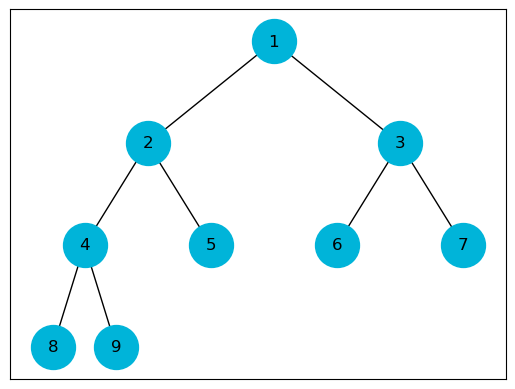

In [10]:
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
show_array_as_tree(heap)

## Sink method

Let h be the height of the subtree rooted at position i, then we have $O(h)$.

Let n be the number of nodes of the subtree rooted at position i. Each subtree has size at most $2n/3$, so for the worst-case running time T of sink, we have 

$$
T(n) \leq T(2n / 3) + \Theta(1)
$$

Which by the master theorem gives

$$
T(n) \in O(\log_2 n)
$$


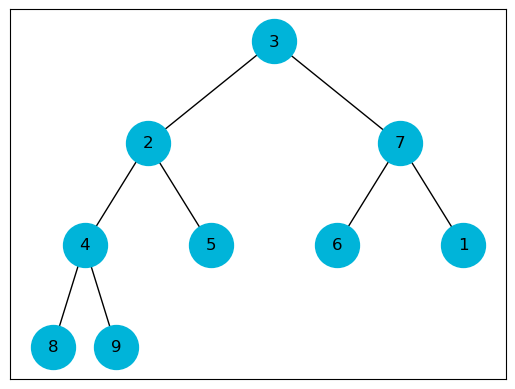

In [53]:
def sink(heap: list, i: int, heap_size: int):
  l = left(i)
  r = right(i)
  if l <= heap_size and heap[i] < heap[l]:
    largest = l
  else:
    largest = i
  if r <= heap_size and heap[largest] < heap[r]:
    largest = r
    
  if largest != i:
    heap[i], heap[largest] = heap[largest], heap[i]
    sink(heap, largest, heap_size)
    
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
sink(heap, 1, heap_size)
show_array_as_tree(heap)

## Swim method
  
Swim also has a worts case running time of:

$$
T(n) \in O(\log_2 n)
$$


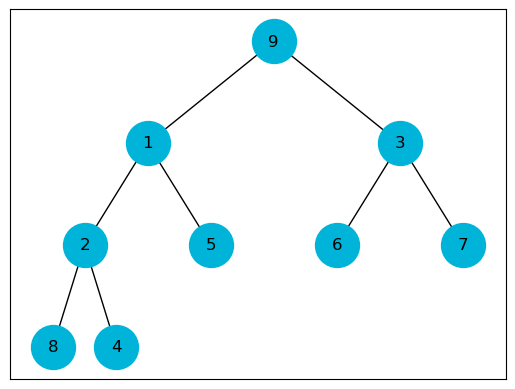

In [30]:
def swim(heap: list, i: int):
  p = parent(i)
    
  if p >= 1 and heap[i] > heap[p]:
    heap[i], heap[p] = heap[p], heap[i]
    swim(heap, p)
    
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
swim(heap, heap_size)
show_array_as_tree(heap)

## Build max heap

A heap with n elements has a height of $\lfloor \log_2 n \rfloor$ and there are at most, $\lceil \frac{n}{2^{h + 1}} \rceil$ nodes rooting subtrees of height h. In total, the worst case running time is 

$$
T(n) \in O(n)
$$

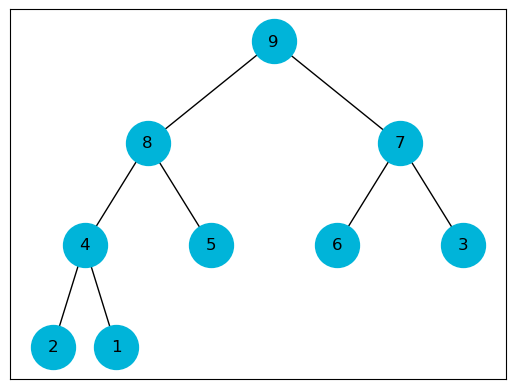

In [31]:
def build_max_heap(heap: list, heap_size: int):
  for i in range(heap_size//2, 0, -1):
    sink(heap, i, heap_size)
    
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
build_max_heap(heap, heap_size)
show_array_as_tree(heap)

Finding the maximum of a max-heap is trivial as it is the element at the root of the tree.

$$
T(n) \in \Theta(1)
$$

In [33]:
def max_heap_maximum(heap: list, heap_size: int):
    if heap_size < 1:
      return None
    else:
      return heap[1]
    
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
build_max_heap(heap, heap_size)
print(max_heap_maximum(heap, heap_size))

9


In $\texttt{max_heap_extract_max()}$ we remove the largerst element, replace it with the last element and sink it to restore the heap.

$$
T(n) \in O(\log_2 n)
$$

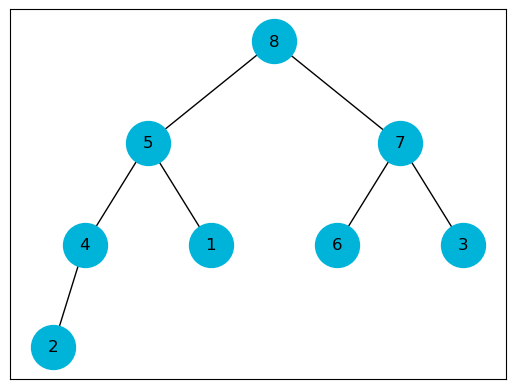

In [54]:
def max_heap_extract_max(heap: list, heap_size: int):
    maximum = max_heap_maximum(heap, heap_size)
    heap[1] = heap[heap_size]
    heap = heap[:-1].copy()
    heap_size -= 1
    sink(heap, 1, heap_size)
    return heap, maximum

heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
build_max_heap(heap, heap_size)
heap, max = max_heap_extract_max(heap, heap_size)
show_array_as_tree(heap)

We insert new values as leaves and let them swim up to restore the heap

$$
T(n) \in O( \log_2 n)
$$

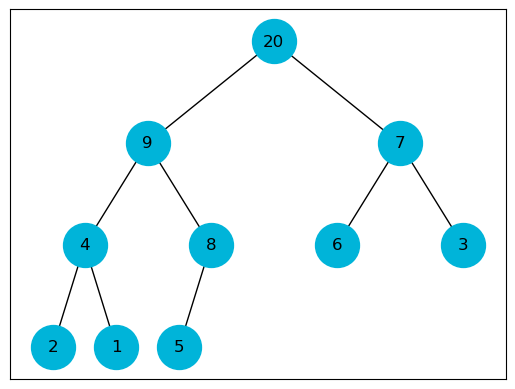

In [55]:
def max_heap_insert(heap: list, item, heap_size: int):
  heap.append(item)
  heap_size += 1
  swim(heap, heap_size)
  
heap = [None, 1, 2, 3, 4, 5, 6, 7, 8, 9]
heap_size = len(heap) - 1
build_max_heap(heap, heap_size)
max_heap_insert(heap, 20, heap_size)
show_array_as_tree(heap)

# Heapsort
The concept works similair to selection sort, but here we sort from right to left.

### Properties
- In-place: Direct representation of heap as array causes no usage of extra memory

### Running time

Building the max heap takes linear time and n iterations over the loop where sink has a running time of $O( \log_2 n)$, so we get a total running time of:

$$
T(n) \in O(n \log_2 n)
$$

In [70]:
def heapsort(array):
  build_max_heap(array, len(array) - 1)

  for i in range(len(array) - 1, 0, -1):
    array[1], array[i] = array[i], array[1]
    sink(array, 1, i - 1)
    
array = [None, 3, 5, 6, 2, 7, 0]
heapsort(array)
print(array)

[None, 0, 2, 3, 5, 6, 7]


# Priority Queue

A priority queue is an abstract data type for maintaining a collection of elements, each with an associated key and a max-priority queue supports the following operation

- $\texttt{insert(x, k)}$: Inserts element $x$ with key $k$
- $\texttt{maximum()}$: Returns the element with the largest key
- $\texttt{extract_max()}$: Returns and removes the element with the largest key

It can insert items with a priority (= key) and can then obtain the item with the highest priority (implementation via heaps)

# Hash Table

Image we have $k$ keys coming from the set $U$, where k is a large or even an infinit number. To pack these into an array $T$ of size $m$, we use a hash function

$$
h : U \mapsto \{0, ..., m-1 \}
$$

(i.e. h = k mod m). We call $h(k)$ the hasch value of $k$.

Because $k \gg m$ we can have overlap, causing different keys to be mapped to the same hash value. Here are two methods to work with these overlaps

### Chaining

In chaining every hash value points to a doubly linked list, where every key with the same hash value gets stored in that doubly linked list.

Implementation
- Search:
  - Search for entry with key $k$ in list $T[h(k)]$
- Removal:
  - Search for and remove element with key $k$ from list $T[h(k)]$
- Insert:
  - Search for entry with key k in list $T[h(k)]$
    -  If found, update node with new value
    - If not found, prepend entry to list at $T[h(k)]$
    
The running time of these operations is dependant on the running time of the doubly linked list.

A independent uniform hash function is seen as the ideal function although it is impossible to implement. This function chooses the hash value from a uniform distribution over the values
 $\{0, ...,m-1 \}$.
 The load factor $\alpha$ is defined as the ration of the number of stored elements and the number of positions in the hash table
 
$$
\alpha = \frac{n}{m}
$$

$\alpha$ is then the average number of entries in a chain.

In a hash table in which collisions are resolved by chaining, a
search (successful or unsuccessful) takes $\Theta(1 + \alpha)$ time on
average, under the assumption of independent uniform hashing.

If the number of elements n is at most proportional to the number
of slots $m (n \leq cm$ for constant $c > 0)$, then $\alpha \leq c \frac{m}{m} \in O(1)$.
Then, the average running time of insertion, deletion and search is $O(1)$.

To maintain an upper bound on the load factor
(and thus constant average running times of operations),
we may need to increase the size of the table.
The change from the previous size m to size m′ requires an
adaptation of the hash function.
In contrast to a size change of an array (where we just move
every entry to the same index of the new memory range), we
need to rehash all elements and insert them anew.

In [5]:
class ChainingHash:
  def __init__(self, size: int):
    self.hashmap = [None] * size
    self.size = size
    
  def hash(self, value: int):
    return value % self.size
  
  def add(self, value: int):
    hash_key = self.hash(value)
    
    if self.hashmap[hash_key] is None:
      linked_list = LinkedList()
      linked_list.append(value)
      self.hashmap[hash_key] = linked_list
    else:
      self.hashmap[hash_key].append(value)
      
  def search(self, value: int):
    hash_key = self.hash(value)
    
    if self.hashmap[hash_key] is not None:
      return self.hashmap[hash_key].find(value)
    return False    
  
  def remove(self, value: int):
    hash_key = self.hash(value)
    
    if self.hashmap[hash_key] is not None:
      self.hashmap[hash_key].pop(value)

### Linear Probing

Linear probing with a load of $\alpha = \frac{n}{m} < 1$ has a worst running time, when the hash has only one slot and a key is not in the hash. The expected number of probes in an unsuccessful search is then at most on average:

$$
\frac{1}{1 - \alpha} = 1 + \alpha + \alpha^2 + \alpha^3 + ...
$$

For a successful search, the expected number of probes is at most:

$$
\frac{1}{\alpha} \log_e \frac{1}{1 - \alpha}
$$

assuming independent uniform permutation hashing with no
deletions and assuming that each key in the table is equally likely
to be searched for.

In [ ]:
class LinearHash:
  def __init__(self, size: int):
    self.hashmap = [None] * size
    self.size = size
    
  def h(self, key: int, index: int):
    pass 
  
  def g(self, key: int, index: int):
    pass  
  
  def insert(self, value: int):    
    for i in range(self.size):
      hash_key = self.h(value, i)

      if self.hashmap[hash_key] is None:
        self.hashmap[hash_key + i] = value
        return hash_key
    
  def search(self, value: int):
    for i in range(self.size):
      hash_key = self.h(value, i)
      
      if self.hashmap[hash_key] == value:
        return hash_key
      if self.hashmap[hash_key] is None:
        break
    return None
  
  def delete(self, index):
    self.hashmap[index] = None
    pos = index
    
    while True:
      pos = (pos + 1) % self.size
      
      if self.hashmap[pos] is None:
        return      
      key = self.hashmap[pos]
      if g(key, index) < g(key, pos):
        break
      
    self.hashmap[index] = key  
    self.delete(pos)

In double hashing, we use two auxilairy hash functions $h_1$ and $h_2$ such that

$$
h(k, i) = (h_1(k) + i h_2(k)) \ \text{mod} \ m
$$

where $h_1$ is the probe position and $h_2$ the step size and $h_2(k)$ must be relatively prime to m.

For deleting use function

$$
g(k, q) = (q - h_1(k)) \ \text{mod} \ m \rightarrow h(k, i) = i \Rightarrow g(k, q) = i
$$

### Hash functions

- Static hasing: Use a single, fixed hash function
  - $h(k) = k \ \text{mod} \ m$
  - $h(k) = \lfloor m(kA - \lfloor kA \rfloor)\rfloor$ for some $0 < A < 1$. $kA - \lfloor kA \rfloor$ gives the fractional part of $kA$. This function works best if $m - 2^l$ where $l \leq w$, where w is the number of bits in a machine word.

# Binary search trees

A tree is a binary search tree if:

- All nodes $y$ in the left subtree of $x$ have a key smaller than x
- all nodes $y$ in the right subtree of $x$ have a key larger than x

A search tree supports the following operations:
- $\texttt{search(n, k)}$: given node $n$ and key $k$, returns the pointer to element with key k in the tree rooted by n or none if no such element in the tree
- $\texttt{insert(n, k, v)}$ adds a node with key $k$ and value $v$ to tree rooted in node $n$.
- $\texttt{delete(n)}$: given a pointer $n$ to a node in the tree, removes $n$
- $\texttt{minimum(n)}$ and $\texttt{maxmimum(n)}$: return the element with the smalles or largest key from the tree rooted in node $n$.
- $\texttt{successor(n)}$: given node $n$ whose key is from a totally ordered set, returns the pointer to the next larger element in the tree, or $None$ if $n$ hold the maximum element.

For $\texttt{inorder_tree_walk(node)}$, the total running time is for $n$ nodes is:

$$
\Theta(n)
$$

Given a tree depth of $h$, the running time for $\texttt{minimum}$, $\texttt{maximum}$, $\texttt{successor}$, $\texttt{insert}$ and $\texttt{delete}$ is:

$$
O(h)
$$

In [31]:
class NodeBST:
    def __init__(self, key, value):
      self.key = key
      self.value = value
      self.parent = None
      self.left = None
      self.right = None

class BST:
  def __init__(self):
    self.root = None
  
  def inorder_tree_walk(self, node: NodeBST):
    if node is not None:
      self.inorder_tree_walk(node.left)
      print(f' {node.key} ')
      self.inorder_tree_walk(node.right)
      
  def search(self, root: NodeBST, key):
    node = root  
    while node is not None:
      if node.key == key:
        return node
      elif node.key < key:
        node = node.right
      else:
        node = node.left
    return None
  
  def minimum(self, root: NodeBST):
    node = root
    while node.left is not None:
      node = node.left
    return node
  
  def maximum(self, root: NodeBST):
    node = root
    while node.right is not None:
      node = node.right
    return node
  
  def successor(self, node: NodeBST):
    if node.right is not None:
      return self.minimum(node.right)
    
    parent = node.parent
    while node is not None and node == node.right:
      node = parent
      parent = node.parent
      
    return parent
  
  def insert(self, key, value):
    node_tree = self.root
    parent = None
    while node_tree is not None:
      parent = node_tree
      if node_tree.key < key:
        node_tree = node_tree.right
      else:
        node_tree = node_tree.left
        
    node = NodeBST(key, value)
    node.parent = parent
    if self.root is None:
      self.root = node
    elif key <  parent.key:
      parent.left = node
    else:
      parent.right = node
      
      
  def transplant(self, u, v):
    if u.parent is None:
      self.root = v
    elif u.parent.left == u:
      u.parent.left = v
    else:
      u.parent.right = v
    
    if v is not None:
      v.parent = u.parent
      #u.parent = v
  
  def delete(self, node: NodeBST):
    if node.left is None:
      self.transplant(node, node.right)
    elif node.right is None:
      self.transplant(node, node.left)
    else:
      s = self.minimum(node.right)
      
      if s != node.right:
        self.transplant(s, node.right)
        s.right = node.right
        node.right.parent = s
      
      self.transplant(node, s)
      s.left = node.left
      s.left.parent = s
        

  def draw(self, only_keys=False): # for drawing; you do not need to understand this code.
    def visit(node, depth=0):
      if node is None:
        return None
      left = visit(node.left, depth+1)
      node_no = next(counter)
      if only_keys:
        labels[node_no] = f"{node.key}"
      else:
        labels[node_no] = f"{node.key}: {node.value}"
      graph.add_node(node_no, depth=depth)
      right = visit(node.right, depth+1)
      if left is not None:
        graph.add_edge(node_no, left)
      if right is not None:
        graph.add_edge(node_no, right)
      return node_no
            
    from itertools import count
    counter = count() # for assigning numbers to nodes
    labels = {}
    graph = nx.Graph()
    visit(self.root)
    # done creating the networkx graph

    pos = {node: (node, -graph.nodes[node]["depth"])
            for node in graph.nodes}
    nx.draw(graph, pos=pos, labels=labels, with_labels = True, node_size=1600, node_color='#ffffff')

In [32]:
bst = BST()
bst.insert(3, "La")
bst.insert(9, "Le")
bst.insert(10, "Lu")
bst.insert(6, "Di")
bst.insert(2, "Del")
bst.insert(4, "Du")
bst.insert(8, "Hu")
bst.inorder_tree_walk(bst.root)
#bst.draw()

 2 
 3 
 4 
 6 
 8 
 9 
 10 


# Red Black trees

Binary search trees can be nice, but under certain circumstrances degenerate into chains, in which case the operation take linear time. In Red black trees, we use on extra bit to store it's color, either $\texttt{red}$ or $\texttt{black}$.
Instead of many leave nodes, we can alternatively introduce a **sentinel node** $\texttt{nil}$, which is a black node but is a child of all leaves and the parent of the root.

A red black tree has then the properties:

- Every node is either black or red
- The root is black
- Every leaf is black (None node)
- If a node is red, then both it's children are black
- For each node, all simple paths from node to descendant leaves contain the same number of black nodes.

The height of a red-black tree with $n$ inner nodes is at most:

$$
2 \log_2 (n + 1)
$$

Let the black height $bh(x)$ of a node $x$ denote the number of black nodes on any simple parth from, but not including, x, down to a leaf. Firstly, we want to show that that the subtree rooted at any node $x$ contains at least 2^{bh(x)} - 1 inner nodes.

1. Heigh of $x$ is 0: $x$ is a leaf and the subtree rooted at x contains $2^{bh(x)} - 1 = 2^0 - 1 = 0$ inner nodes.
2. $x$ > 0: Then $x$ has two children. If a child is black, it contributes 1 to $x$'s black-height but not to it's own. If a child is red  then it contributes to neither $x$'s black height or it's own. From this it follows that each child of $x$ has a black height of $bh(x) - 1$ or $bh(x)$. Since the height of the child is smaller than the one of x, by the inductive hypothesis the subtree rooted by each child has at least $2^{bh(x) - 1} - 1$ inner nodes. Thus, the subtree rooted by x contains at least $2(2^{bh(x)−1} − 1) + 1 = 2^{bh(x)} − 1$ inner nodes.

Because each subtree rooted at $x$ contains atleast $2^{bh(x)} - 1$ inner nodes. If we let $h$ be the height of the tree. Since both children of a red node must be black, atleast half of the nodes on any simple path from the root to the a leaf (not including root) must be black, since after a red node there must be a black node, so atleast half of the nodes must be black. Thus the black-height of the root is atleast h/2 and thus

$$
n > 2^{h/2} - 1 \Rightarrow h \leq 2 \log_2 (n + 1) 
$$

Thus the height of a red-black tree is $O(\log_2(n))$. Because red-black-trees are binary seach trees, all functionality which runs at $O(h)$, can with red-black-trees achieve a running time of $O(\log_2(n))$.

### Insertion and deletion

Inserting and deleting as in binary search trees is not possible as it does not preserve the red-black property. We use an operation called rotation to fix this.

![png](rotation_redblacktree.png)

In [ ]:
class RedBlackTree:
    class Node:
        def __init__(self, key, value, color: str):
            self.key = key
            self.value = value
            self.parent = None
            self.left = None
            self.right = None
            self.color = color

    def __init__(self):
        self.nil = Node(None, None, color='BLACK')
        self.root = self.nil
        
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        
        if y.left is not self.nil:
            y.left.parent = x
        y.parent = x.parent
        
        if x.parent is self.nil:
            self.root = y
        elif x is x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        
        y.left = x
        x.parent = y
        

During insertion and deletion, only two violations to the properties can occur:
1. That the root is black
2. That if a node is red, then both its children are black

For 1 we can just color the root black but for 2. the node and its parent are both red:

1. The uncle node is red $\Rightarrow$ color grandparent red and children of grandparent black. Then afterwards fixup the grandparent and so on.
2. The uncle of node is black and node is a right child $\Rightarrow$ Perform a left rotation, then make parent black and grandparent red, then right rotation on grandparent
3. The uncle of node is black and node is a left child $\Rightarrow$ Make parent black and grandparent red, then right rotation on grandparent

The running time for the fixup and insertion is 

$$
O(h)
$$

For deletion a running time of 

$$
O(\log_2 n)
$$

is possible

# ADTs Map and Set

Dynamic set is a set which can grow, shrink or otherwise change, is finite and the entries (keys) can sometimes be associated with satellite data.

### Map

A map (dictionary) stores (key, value) pairs such that each possible key occurs at most once in the collection. It supports the following operations:

1. $\texttt{Insert}$: Insert a given key and value. If the key is already present, update the associated value
2. $\texttt{Remove}$: Remove the entry for a given key
3. $\texttt{Lookup}$: Lookup the entry for a given key, or return that there is no such key present.

The datastructures: [***Linked list***, ***hash table***, ***binary search tree***, ***red black tree***] can be used to implement maps.

### Set

A set stores keys such tha teach possible key occurs at most once in the collection. It supports the following operations:

1. $\texttt{Insert}$: Insert a given key into a set, if it is not already included
2. $\texttt{Remove}$: Remove the given key from a set
3. $\texttt{Lookup}$: Lookup wether a given key is in a set
4. $\texttt{Iteration}$: Iteration over all element of a set in an arbitrary order 

Additional operations can be

5. $\texttt{Union}$: Union of two sets
6. $\texttt{Intersection}$: Intersection of two sets
7. $\texttt{Difference}$: Difference of two sets

The datastructures: [***Linked list***, ***hash table***, ***binary search tree***, ***red black tree***] can be used to implement sets.

With sets we only store keys. The implementation of operations can be done based on core implementation or special algorithms and differ from datastructure. With red-black-trees, union, intersection etc can be done in $O(m \log(\frac{n}{m} + 1))$ for two red black trees of sizes $m$ and $n$ where $m \leq n$.